In [1]:
#import mnist
from sklearn.datasets.base import get_data_home
print(get_data_home())
from sklearn.datasets import fetch_mldata

C:\Users\Yasser Makram\scikit_learn_data


In [2]:
from shutil import copyfileobj
from six.moves import urllib
from sklearn.datasets.base import get_data_home
import os

def fetch_mnist(data_home=None):
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    data_home = get_data_home(data_home=data_home)
    data_home = os.path.join(data_home, 'mldata')
    if not os.path.exists(data_home):
        os.makedirs(data_home)
    mnist_save_path = os.path.join(data_home, "mnist-original.mat")
    if not os.path.exists(mnist_save_path):
        mnist_url = urllib.request.urlopen(mnist_alternative_url)
        with open(mnist_save_path, "wb") as matlab_file:
            copyfileobj(mnist_url, matlab_file)

In [4]:
fetch_mnist()
mnist = fetch_mldata('MNIST original')

C:\Users\Yasser Makram\AppData\Local\conda\conda\envs\homl\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Yasser Makram\AppData\Local\conda\conda\envs\homl\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [6]:
X, y = mnist["data"], mnist["target"]

In [7]:
%matplotlib inline

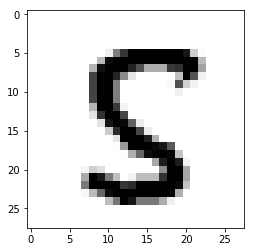

In [15]:
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[42]
some_digit = X_train[y_train_5][4]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [11]:
import numpy as np
shuffle_idx = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_idx], y_train[shuffle_idx]

In [12]:
y_train_5_idx, y_train_not_5_idx = y_train[:]==5, y_train[:]!=5
X_train_5, y_train_5 = X_train[y_train_5_idx], y_train[y_train_5_idx]
X_train_not_5, y_train_not_5 = X_train[y_train_not_5_idx], y_train[y_train_not_5_idx]
y_train_5.shape, y_train_not_5.shape

((5421,), (54579,))

In [14]:
y_train_5, y_test_5 = y_train[:]==5, y_test[:]==5

In [16]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train_5)

C:\Users\Yasser Makram\AppData\Local\conda\conda\envs\homl\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
# some_digit = X_train[y_test_5][6]
sgd.predict(some_digit.reshape(1, -1))

array([ True])

In [19]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd, X_train, y_train_5, cv=3, scoring="accuracy")

C:\Users\Yasser Makram\AppData\Local\conda\conda\envs\homl\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Yasser Makram\AppData\Local\conda\conda\envs\homl\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Yasser Makram\AppData\Local\conda\conda\envs\homl\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol 

array([0.96675, 0.9547 , 0.9669 ])

In [20]:
# a classifier that detects no 5s

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never5_clf = Never5Classifier()
# not needed as the class does not learn
# never5_clf.fit()
cross_val_score(never5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9104 , 0.90685, 0.9117 ])